In [9]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
import datetime
import time

In [10]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler =MinMaxScaler()

In [11]:
data= pd.read_excel('600085done.xlsx')
data=data.drop(columns=['Date'])
data

,Open,Close,High,Low,Volume,成交额,振幅,涨跌幅,涨跌额,换手率,...,DIF,DEA,MACD,RSI6,RSI12,CCI 14,OBV,BOLLMID,BOLLUPPER,BOLLLOWER
0,19.72,19.62,19.72,19.36,120763,269586496,1.83,-0.41,-0.08,0.92,...,-0.167664,-0.249047,0.162765,54.181109,49.427043,57.415079,-226454,19.5270,20.593664,18.460336
1,19.49,20.02,20.13,19.42,174185,395652016,3.62,2.04,0.40,1.27,...,-0.115555,-0.222348,0.213587,65.356418,54.866154,105.018272,-52269,19.4865,20.394575,18.578425
2,20.02,20.42,20.56,19.74,170104,390894016,4.10,2.00,0.40,1.24,...,-0.041502,-0.186179,0.289354,73.200231,59.605520,146.317531,117835,19.4860,20.391896,18.580104
3,20.16,20.16,20.89,19.92,171740,398464240,4.75,-1.27,-0.26,1.25,...,-0.003752,-0.149694,0.291884,62.213173,55.474890,139.382920,-53905,19.4920,20.414778,18.569222
4,20.16,19.68,20.16,19.46,109746,247257153,3.47,-2.38,-0.48,0.80,...,-0.012423,-0.122239,0.219633,46.688351,48.680627,44.100930,-163651,19.4890,20.408769,18.569231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,54.58,54.90,54.94,53.90,72188,392398397,1.90,0.46,0.25,0.53,...,0.715365,0.393055,0.644619,79.186993,69.045539,123.824630,25848582,52.4245,54.932126,49.916874
2157,54.65,53.80,55.10,53.43,72414,392881235,3.04,-2.00,-1.10,0.53,...,0.697935,0.454031,0.487807,54.951124,57.841573,80.582940,25776168,52.5535,55.065671,50.041329
2158,53.65,53.46,53.93,52.85,64723,346058717,2.01,-0.63,-0.34,0.47,...,0.649202,0.493066,0.312274,49.349025,54.840921,32.139078,25711445,52.6785,55.104120,50.252880
2159,53.25,53.21,53.60,53.00,42471,226247678,1.12,-0.47,-0.25,0.31,...,0.583681,0.511189,0.144984,45.276279,52.650015,15.125516,25668974,52.7565,55.142876,50.370124


In [12]:
X=data.drop(['Close'],axis=1)
Y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split#用于划分训练集和测试集
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,shuffle=False)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# 构建LSTM模型
model = Sequential()

model.add(LSTM(128,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])
# 训练榄型
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=100,epochs=32)

2024-01-12 17:16:36.437846: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 17:16:36.439600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 17:16:36.441507: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/32


2024-01-12 17:16:36.690390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 17:16:36.692076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 17:16:36.693736: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

15/16 [===========================>..] - ETA: 0s - loss: 708.2778 - acc: 0.0000e+00

2024-01-12 17:16:42.615843: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 17:16:42.618792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 17:16:42.620533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - 7s 162ms/step - loss: 706.1780 - acc: 0.0000e+00 - val_loss: 1353.5599 - val_acc: 0.0000e+00
Epoch 2/32
16/16 [==============================] - 1s 82ms/step - loss: 158.8242 - acc: 0.0000e+00 - val_loss: 566.2585 - val_acc: 0.0000e+00
Epoch 3/32
16/16 [==============================] - 1s 75ms/step - loss: 16.8948 - acc: 0.0000e+00 - val_loss: 318.7618 - val_acc: 0.0000e+00
Epoch 4/32
16/16 [==============================] - 1s 75ms/step - loss: 14.7339 - acc: 0.0000e+00 - val_loss: 343.7232 - val_acc: 0.0000e+00
Epoch 5/32
16/16 [==============================] - 1s 75ms/step - loss: 11.9590 - acc: 0.0000e+00 - val_loss: 388.8138 - val_acc: 0.0000e+00
Epoch 6/32
16/16 [==============================] - 1s 76ms/step - loss: 11.9244 - acc: 0.0000e+00 - val_loss: 382.1716 - val_acc: 0.0000e+00
Epoch 7/32
16/16 [==============================] - 2s 107ms/step - loss: 11.8049 - acc: 0.0000e+00 - val_loss: 371.3720 - val_acc: 0.0000e+00
Epoch 8/32
1

In [15]:
predicted_prices = model.predict(X_test)
predicted_prices

2024-01-12 17:17:30.468268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-12 17:17:30.470199: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-12 17:17:30.472109: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

21/21 [==============================] - 2s 15ms/step


array([[29.758593],
       [27.446554],
       [30.2229  ],
       [27.461031],
       [27.453602],
       [27.44818 ],
       [27.445244],
       [29.765242],
       [30.223417],
       [30.223507],
       [30.223816],
       [29.752333],
       [29.234098],
       [28.971233],
       [27.461916],
       [27.46322 ],
       [27.4611  ],
       [27.467022],
       [27.457836],
       [27.465382],
       [27.483503],
       [27.457449],
       [27.456255],
       [27.453478],
       [27.455307],
       [27.458889],
       [27.458197],
       [27.46119 ],
       [27.455282],
       [27.460293],
       [30.206665],
       [30.227774],
       [30.227844],
       [30.227842],
       [29.775131],
       [27.468786],
       [29.162512],
       [27.45678 ],
       [27.45903 ],
       [27.454731],
       [27.453978],
       [27.45521 ],
       [27.45876 ],
       [27.456625],
       [27.463367],
       [30.2264  ],
       [27.472599],
       [27.552685],
       [27.472485],
       [27.465452],


In [16]:
predd=[]
for i in range(len(predicted_prices)):
    predd.append(predicted_prices[i][0])

gd=[]
for i in range(len(predd)-1):
    if predd[i]<predd[i+1]:
        gd.append(1)
    else:
        gd.append(0)
gd.append(0)
gd

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,


In [18]:
data= pd.read_excel('600085copy.xlsx')
data=data.drop(columns=['Date','Close'])
X=data.drop(['updowm'],axis=1)
Y=data['updowm']
from sklearn.model_selection import train_test_split#用于划分训练集和测试集
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,shuffle=False)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
x=0
for i in range(len(gd)):

    if Y_test.iloc[i] == gd[i]:
        x=x+1
jg=x/len(gd)
jg

0.7211093990755008

In [20]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
print(classification_report(Y_test,gd))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       327
           1       0.73      0.70      0.71       322

    accuracy                           0.72       649
   macro avg       0.72      0.72      0.72       649
weighted avg       0.72      0.72      0.72       649



In [22]:
cm=confusion_matrix(Y_test,gd,labels=[0,1])
cm

array([[243,  84],
       [ 97, 225]])

Text(33.0, 0.5, 'true')

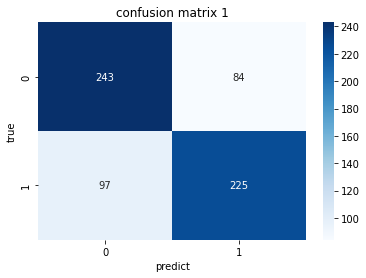

In [24]:
import seaborn as sn
ax = sn.heatmap(cm,annot=True,fmt='.20g',cmap="Blues")
ax.set_title('confusion matrix 1') #title
ax.set_xlabel('predict') #x axis
ax.set_ylabel('true') #y axis